### Testing of Data Cleaning Operations and Dataset Assessment on the stop-by-stop data on the 46a
- This file is a a practice notebook for analysing the quality of the data for the merged data on the 46a bus line.
- The file sought to identify potential isssues and characteristics of the data for the stop-by-stop data asa whole.
- Many of these operations were not used but it was useful to draw insights from the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
cd tmp

/home/team9/tmp


In [4]:
cd data

/home/team9/tmp/data


In [60]:
ls

Custom_location_53_345035_-6_267261_62b5c8e6c91d98000ba01ceb.csv
rt_leavetimes_DB_2018.txt
rt_trips_DB_2018.txt
rt_vehicles_DB_2018.txt
rt_vehicles_DB_2018.zip
test_46a_dask.csv
trips_modelling.csv
weather_factorised.csv
weather_trips.csv


In [ ]:
# rm test_46a_dask.csv

In [6]:
LT_46A_68_1 = pd.read_csv('test_46a_dask.csv')

In [7]:
LT_46A_68_1

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,...,HOUR_DEPARTURE,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date,ROUTE_DIRECTION
0,2018-01-02,5968538,32,2017,28616,28616,27885.0,27896.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,1.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
1,2018-01-02,5968538,45,2035,29338,29338,28416.0,28416.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,1.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
2,2018-01-02,5968538,40,4567,29069,29069,28216.0,28240.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,1.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
3,2018-01-02,5968538,14,758,27483,27483,27219.0,27219.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,1.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
4,2018-01-02,5968538,47,2039,29419,29419,28506.0,28506.0,1930279,46A,...,7.0,1.514876e+09,2.0,10.0,3.0,1.0,9.0,11.0,2018-01-02 07:00:00,46A_68_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,2018-12-18,8453335,41,2031,29509,29509,29574.0,29574.0,1932339,46A,...,8.0,1.545120e+09,3.0,10.0,2.0,1.0,9.0,11.0,2018-12-18 08:00:00,46A_68_1
14470,2018-12-17,8453335,11,2795,27395,27395,27726.0,27744.0,1930279,46A,...,7.0,1.545030e+09,2.0,10.0,1.0,0.0,0.0,7.0,2018-12-17 07:00:00,46A_68_1
14471,2018-12-17,8453335,22,2009,28147,28147,28478.0,28492.0,1930279,46A,...,7.0,1.545030e+09,2.0,10.0,1.0,0.0,0.0,7.0,2018-12-17 07:00:00,46A_68_1
14472,2018-12-17,8453335,32,2017,28865,28865,29162.0,29174.0,1930279,46A,...,8.0,1.545034e+09,2.0,10.0,2.0,0.0,0.0,7.0,2018-12-17 08:00:00,46A_68_1


In [8]:
LT_46A_68_1.shape

(14474, 24)

In [9]:
LT_46A_68_1.nunique()

DAYOFSERVICE            196
TRIPID                   60
PROGRNUMBER              47
STOPPOINTID              47
PLANNEDTIME_ARR        1343
PLANNEDTIME_DEP        1343
ACTUALTIME_ARR         4602
ACTUALTIME_DEP         4595
VEHICLEID                89
LINEID                    1
ROUTEID                   1
DIRECTION                 1
PLANNEDTIME_DEP_T         2
ACTUALTIME_DEP_T        191
HOUR_DEPARTURE            3
dt                      393
temp                      5
visibility               11
wind_speed                9
weather_main              2
weather_description      14
weather_icon             16
date                    393
ROUTE_DIRECTION           1
dtype: int64

In [10]:
LT_46A_68_1.dtypes

DAYOFSERVICE            object
TRIPID                   int64
PROGRNUMBER              int64
STOPPOINTID              int64
PLANNEDTIME_ARR          int64
PLANNEDTIME_DEP          int64
ACTUALTIME_ARR         float64
ACTUALTIME_DEP         float64
VEHICLEID                int64
LINEID                  object
ROUTEID                 object
DIRECTION                int64
PLANNEDTIME_DEP_T        int64
ACTUALTIME_DEP_T       float64
HOUR_DEPARTURE         float64
dt                     float64
temp                   float64
visibility             float64
wind_speed             float64
weather_main           float64
weather_description    float64
weather_icon           float64
date                    object
ROUTE_DIRECTION         object
dtype: object

In [11]:
LT_46A_68_1.isnull().sum()

DAYOFSERVICE              0
TRIPID                    0
PROGRNUMBER               0
STOPPOINTID               0
PLANNEDTIME_ARR           0
PLANNEDTIME_DEP           0
ACTUALTIME_ARR            0
ACTUALTIME_DEP            0
VEHICLEID                 0
LINEID                    0
ROUTEID                   0
DIRECTION                 0
PLANNEDTIME_DEP_T         0
ACTUALTIME_DEP_T       2487
HOUR_DEPARTURE            0
dt                        0
temp                      0
visibility                0
wind_speed                0
weather_main              0
weather_description       0
weather_icon              0
date                      0
ROUTE_DIRECTION           0
dtype: int64

In [12]:
nulls_lt = LT_46A_68_1[LT_46A_68_1["ACTUALTIME_DEP_T"].isnull() == True]

In [13]:
nulls_lt.shape

(2487, 24)

In [14]:
nulls_lt = nulls_lt[["ACTUALTIME_DEP_T", "PLANNEDTIME_DEP_T", "PROGRNUMBER", "DAYOFSERVICE"]]

In [15]:
nulls_lt

,ACTUALTIME_DEP_T,PLANNEDTIME_DEP_T,PROGRNUMBER,DAYOFSERVICE
0,NaN,26400,32,2018-01-02
1,NaN,26400,45,2018-01-02
2,NaN,26400,40,2018-01-02
3,NaN,26400,14,2018-01-02
4,NaN,26400,47,2018-01-02
...,...,...,...,...
14465,NaN,26400,43,2018-12-19
14470,NaN,26400,11,2018-12-17
14471,NaN,26400,22,2018-12-17
14472,NaN,26400,32,2018-12-17


In [16]:
nulls_lt.nunique()

ACTUALTIME_DEP_T      0
PLANNEDTIME_DEP_T     2
PROGRNUMBER          46
DAYOFSERVICE         53
dtype: int64

In [17]:
nulls2time = nulls_lt.loc[nulls_lt["PLANNEDTIME_DEP_T"] != 26400]

In [18]:
nulls2time

,ACTUALTIME_DEP_T,PLANNEDTIME_DEP_T,PROGRNUMBER,DAYOFSERVICE
80,NaN,27600,36,2018-01-03
81,NaN,27600,38,2018-01-03
82,NaN,27600,39,2018-01-03
83,NaN,27600,40,2018-01-03
84,NaN,27600,41,2018-01-03
...,...,...,...,...
11749,NaN,27600,10,2018-09-07
11750,NaN,27600,44,2018-09-07
11770,NaN,27600,29,2018-09-06
11773,NaN,27600,22,2018-09-06


In [19]:
LT_46A_68_1 = LT_46A_68_1.dropna()

In [20]:
LT_46A_68_1.isnull().sum()

DAYOFSERVICE           0
TRIPID                 0
PROGRNUMBER            0
STOPPOINTID            0
PLANNEDTIME_ARR        0
PLANNEDTIME_DEP        0
ACTUALTIME_ARR         0
ACTUALTIME_DEP         0
VEHICLEID              0
LINEID                 0
ROUTEID                0
DIRECTION              0
PLANNEDTIME_DEP_T      0
ACTUALTIME_DEP_T       0
HOUR_DEPARTURE         0
dt                     0
temp                   0
visibility             0
wind_speed             0
weather_main           0
weather_description    0
weather_icon           0
date                   0
ROUTE_DIRECTION        0
dtype: int64

In [21]:
check_1pn = LT_46A_68_1.loc[LT_46A_68_1["PROGRNUMBER"] == 1]

In [22]:
check_1pn = check_1pn[["ACTUALTIME_DEP_T", "PLANNEDTIME_DEP_T", "PROGRNUMBER", "DAYOFSERVICE", "ACTUALTIME_DEP", "PLANNEDTIME_DEP"]]

In [23]:
LT_46A_68_1 = LT_46A_68_1.drop(["PLANNEDTIME_DEP_T", "ACTUALTIME_DEP_T", "date", "dt"], axis=1)

In [24]:
LT_46A_68_1

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,ROUTEID,DIRECTION,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION
37,2018-01-02,5958760,47,2039,30874,30874,30882.0,30882.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1
38,2018-01-02,5958760,45,2035,30784,30784,30787.0,30821.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1
39,2018-01-02,5958760,44,2034,30728,30728,30729.0,30740.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1
40,2018-01-02,5958760,43,2033,30704,30704,30696.0,30707.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1
41,2018-01-02,5958760,41,2031,30546,30546,30595.0,30621.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14461,2018-12-20,8453335,39,4566,29338,29338,29264.0,29264.0,1000299,46A,46A_68,1,8.0,2.0,10.0,1.0,0.0,19.0,5.0,46A_68_1
14466,2018-12-18,8453335,12,756,27482,27482,27674.0,27682.0,1932339,46A,46A_68,1,7.0,3.0,10.0,2.0,1.0,5.0,11.0,46A_68_1
14467,2018-12-18,8453335,21,2008,28084,28084,28198.0,28198.0,1932339,46A,46A_68,1,7.0,3.0,10.0,2.0,1.0,5.0,11.0,46A_68_1
14468,2018-12-18,8453335,31,2015,28833,28833,28911.0,28919.0,1932339,46A,46A_68,1,8.0,3.0,10.0,2.0,1.0,9.0,11.0,46A_68_1


In [25]:
LT_46A_68_1.nunique()

DAYOFSERVICE            179
TRIPID                   58
PROGRNUMBER              47
STOPPOINTID              47
PLANNEDTIME_ARR        1343
PLANNEDTIME_DEP        1343
ACTUALTIME_ARR         4342
ACTUALTIME_DEP         4324
VEHICLEID                87
LINEID                    1
ROUTEID                   1
DIRECTION                 1
HOUR_DEPARTURE            3
temp                      5
visibility               11
wind_speed                9
weather_main              2
weather_description      14
weather_icon             16
ROUTE_DIRECTION           1
dtype: int64

In [26]:
CHECK = LT_46A_68_1[["TRIPID", "PROGRNUMBER", "DAYOFSERVICE"]]

In [27]:
CHECK.nunique()

TRIPID           58
PROGRNUMBER      47
DAYOFSERVICE    179
dtype: int64

In [28]:
CHECK.duplicated(keep=False).sum()

0

In [29]:
CHECK["PROGRNUMBER"].value_counts()

1     260
5     259
2     259
3     259
4     259
6     259
13    258
12    258
8     258
7     258
9     258
10    258
11    258
14    257
15    256
18    256
17    256
16    256
47    255
28    254
29    254
20    254
32    254
31    254
30    254
42    253
41    253
23    253
22    253
39    253
36    253
43    253
46    253
44    253
24    253
40    253
35    253
38    253
37    253
21    253
33    253
27    253
26    253
25    253
45    253
19    253
34    253
Name: PROGRNUMBER, dtype: int64

- stops are missing for a small number of trips.
- most of the numbers with less counts are larger numbers so it is liekly because the bus trip was incomplete.

In [30]:
CHECK["PROGRNUMBER"].max()

47

In [31]:
CHECK["PROGRNUMBER"].min()

1

In [32]:
tripsids = CHECK.TRIPID.unique()
print(tripsids)

[5958760 5968538 6105593 6103601 6107703 6109092 6223012 6215245 6234929
 6241377 6253918 6246423 6279724 6280265 6286317 6388471 6397901 6366038
 6379629 6410603 6404347 6583906 6598684 6600168 6630124 6630638 6643302
 6638206 6658312 6653011 6770480 6774007 6835578 6845366 6749579 6745582
 6756578 6755929 6853274 6858284 6879195 6876307 7513908 7498790 7649290
 7644207 7760318 8096715 7783978 8021862 8058603 8065600 8113203 8119705
 8140518 8150434 8177996 8453335]


In [33]:
dates = CHECK.DAYOFSERVICE.unique()
print(dates)

['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-08'
 '2018-01-09' '2018-01-10' '2018-01-11' '2018-01-12' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-22'
 '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26' '2018-01-30'
 '2018-01-29' '2018-02-01' '2018-02-16' '2018-02-02' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-12'
 '2018-02-13' '2018-02-15' '2018-02-19' '2018-02-20' '2018-02-21'
 '2018-02-22' '2018-02-23' '2018-02-27' '2018-02-28' '2018-02-14'
 '2018-02-26' '2018-03-07' '2018-03-05' '2018-03-06' '2018-03-08'
 '2018-03-09' '2018-03-12' '2018-03-13' '2018-03-14' '2018-03-15'
 '2018-03-16' '2018-03-19' '2018-03-20' '2018-03-21' '2018-03-22'
 '2018-03-23' '2018-03-26' '2018-03-27' '2018-03-28' '2018-03-29'
 '2018-03-30' '2018-04-03' '2018-04-04' '2018-04-05' '2018-04-06'
 '2018-04-09' '2018-04-10' '2018-04-11' '2018-04-12' '2018-04-13'
 '2018-04-16' '2018-04-23' '2018-04-17' '2018-04-18' '2018-04-19'
 '2018-04-

#### The following code set to idnetify instances of trips where progress numbers were missing.
#### This code ended up being unnecessary because of the manner in which we trained the model.

In [34]:
%%time
bad_trips = []
for j in dates:
    for i in tripsids:
        curr = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i) & (LT_46A_68_1["DAYOFSERVICE"] == j)]
        if len(curr) == 0:
            pass
        else:
            n_stops = curr["PROGRNUMBER"].count()
            if n_stops != 47:
                bad_trips.append([i, j])
    
#not necessary to use because predicting by row instead of combinations of stops
print(bad_trips)

[[5968538, '2018-01-03'], [6105593, '2018-01-10'], [6397901, '2018-03-19'], [6583906, '2018-03-27'], [6638206, '2018-04-17'], [6643302, '2018-04-20'], [6770480, '2018-05-21'], [7498790, '2018-08-27'], [8096715, '2018-09-21'], [7783978, '2018-10-05']]
CPU times: user 16 s, sys: 0 ns, total: 16 s
Wall time: 16 s


In [35]:
%%time
for i in bad_trips:
    LT_46A_68_1 = LT_46A_68_1.drop(LT_46A_68_1[(LT_46A_68_1.TRIPID == i[0]) & (LT_46A_68_1.DAYOFSERVICE == i[1])].index)

CPU times: user 31.4 ms, sys: 8.12 ms, total: 39.5 ms
Wall time: 36.8 ms


In [36]:
print(len(dates))

179


In [37]:
print(len(bad_trips))

10


In [38]:
new_dates = LT_46A_68_1.DAYOFSERVICE.unique()
print(len(new_dates))


173


In [39]:
%%time
bad_trips = []
for j in dates:
    for i in tripsids:
        curr = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i) & (LT_46A_68_1["DAYOFSERVICE"] == j)]
        if len(curr) == 0:
            pass
        else:
            n_stops = curr["PROGRNUMBER"].count()
            if n_stops != 47:
                bad_trips.append([i, j])

CPU times: user 15.9 s, sys: 13.3 ms, total: 15.9 s
Wall time: 15.9 s


In [40]:
print(len(bad_trips))

0


In [41]:
CHECK.loc[(CHECK["TRIPID"] == 7498790)]

,TRIPID,PROGRNUMBER,DAYOFSERVICE
10227,7498790,46,2018-08-28
10229,7498790,29,2018-08-28
10231,7498790,34,2018-08-28
10233,7498790,39,2018-08-28
10235,7498790,42,2018-08-28
...,...,...,...
10642,7498790,35,2018-08-28
10646,7498790,3,2018-08-28
10652,7498790,15,2018-08-29
10655,7498790,19,2018-08-29


In [42]:
# needed to make new list of dates and trip IDs
dates = LT_46A_68_1.DAYOFSERVICE.unique()
print(len(dates))

tripsids = LT_46A_68_1.TRIPID.unique()
print(len(tripsids))

173
58


#### Following code was made to find trip instances where a later stop had an earlier arrival time than a previous stop which would signal that a trip consisted of unreliable data.
#### There was no instances of it found in this data set and the run time on the operation was quite long as well as being relatively memory intensive so the method was excluded from the final cleaning of the data as a whole.

In [43]:
%%time
bad_stops = []
valid_combs = []
for d in dates:
    comb_df = LT_46A_68_1.loc[(LT_46A_68_1["DAYOFSERVICE"] == d)]
    comb_trips = comb_df.TRIPID.unique()
    for t in comb_trips:
        valid_combs.append([t, d])




for i in valid_combs:

    trip_temp = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i[0]) & (LT_46A_68_1["DAYOFSERVICE"] == i[1])]
          
    num_stops = trip_temp["PROGRNUMBER"].max()
    


    for n in range(1, num_stops-1):

        curr_stop = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i[0]) & (LT_46A_68_1["DAYOFSERVICE"] == i[1]) & (LT_46A_68_1["PROGRNUMBER"] == n)]
        next_stop = LT_46A_68_1.loc[(LT_46A_68_1["TRIPID"] == i[0]) & (LT_46A_68_1["DAYOFSERVICE"] == i[1]) & (LT_46A_68_1["PROGRNUMBER"] == (n +1))]

        next_val = next_stop.iloc[0]["ACTUALTIME_ARR"]
        curr_val = curr_stop.iloc[0]["ACTUALTIME_ARR"]

        if next_val < curr_val :
            bad_stops.append([i, j]) #entire route will be corrupted
            break


print(bad_stops) 

# make code to remove the trips with bad data

[]
CPU times: user 44.3 s, sys: 1.76 ms, total: 44.3 s
Wall time: 44.3 s


- No values in the array so no bad data here
- Will still need to edit it to remove them for processing the entire data set
- the 43 seconds it took looks slow but originally it was 1 minute and 10 seconds

In [44]:
LT_46A_68_1.head(1)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,ROUTEID,DIRECTION,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION
37,2018-01-02,5958760,47,2039,30874,30874,30882.0,30882.0,1932297,46A,46A_68,1,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1


In [45]:
LT_46A_68_1["A_error"] = (LT_46A_68_1["ACTUALTIME_ARR"] - LT_46A_68_1['PLANNEDTIME_ARR'])
LT_46A_68_1["D_error"] = (LT_46A_68_1["ACTUALTIME_DEP"] - LT_46A_68_1['PLANNEDTIME_DEP'])

In [46]:
LT_46A_68_1.head(1)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,...,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION,A_error,D_error
37,2018-01-02,5958760,47,2039,30874,30874,30882.0,30882.0,1932297,46A,...,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1,8.0,8.0


In [47]:
LT_46A_68_1.loc[(LT_46A_68_1["A_error"] != LT_46A_68_1["D_error"])]

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,LINEID,...,HOUR_DEPARTURE,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,ROUTE_DIRECTION,A_error,D_error
38,2018-01-02,5958760,45,2035,30784,30784,30787.0,30821.0,1932297,46A,...,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1,3.0,37.0
39,2018-01-02,5958760,44,2034,30728,30728,30729.0,30740.0,1932297,46A,...,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1,1.0,12.0
40,2018-01-02,5958760,43,2033,30704,30704,30696.0,30707.0,1932297,46A,...,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1,-8.0,3.0
41,2018-01-02,5958760,41,2031,30546,30546,30595.0,30621.0,1932297,46A,...,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1,49.0,75.0
42,2018-01-02,5958760,40,4567,30475,30475,30520.0,30542.0,1932297,46A,...,8.0,2.0,10.0,2.0,1.0,9.0,11.0,46A_68_1,45.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14456,2018-12-21,8453335,36,2021,29063,29063,28827.0,28872.0,1000299,46A,...,8.0,2.0,6.0,1.0,0.0,7.0,9.0,46A_68_1,-236.0,-191.0
14458,2018-12-20,8453335,6,842,27038,27038,27145.0,27155.0,1000299,46A,...,7.0,2.0,10.0,1.0,0.0,19.0,5.0,46A_68_1,107.0,117.0
14459,2018-12-20,8453335,17,761,27821,27821,27873.0,27881.0,1000299,46A,...,7.0,2.0,10.0,1.0,0.0,19.0,5.0,46A_68_1,52.0,60.0
14466,2018-12-18,8453335,12,756,27482,27482,27674.0,27682.0,1932339,46A,...,7.0,3.0,10.0,2.0,1.0,5.0,11.0,46A_68_1,192.0,200.0


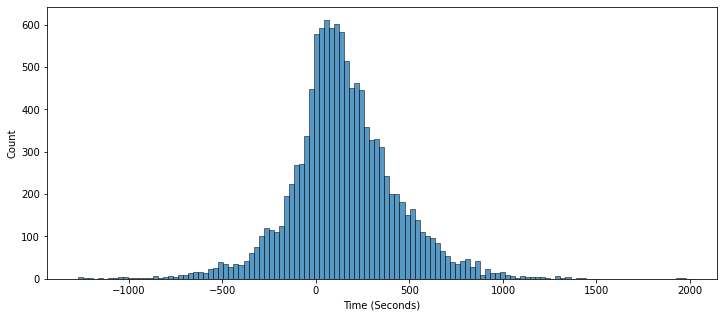

In [48]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(LT_46A_68_1['A_error'],kde = False)
plt.xlabel('Time (Seconds)')

plt.show()

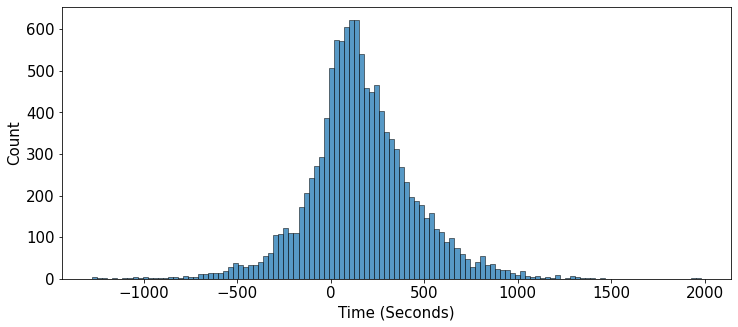

In [49]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(LT_46A_68_1['D_error'],kde = False)
plt.xlabel('Time (Seconds)')

plt.show()

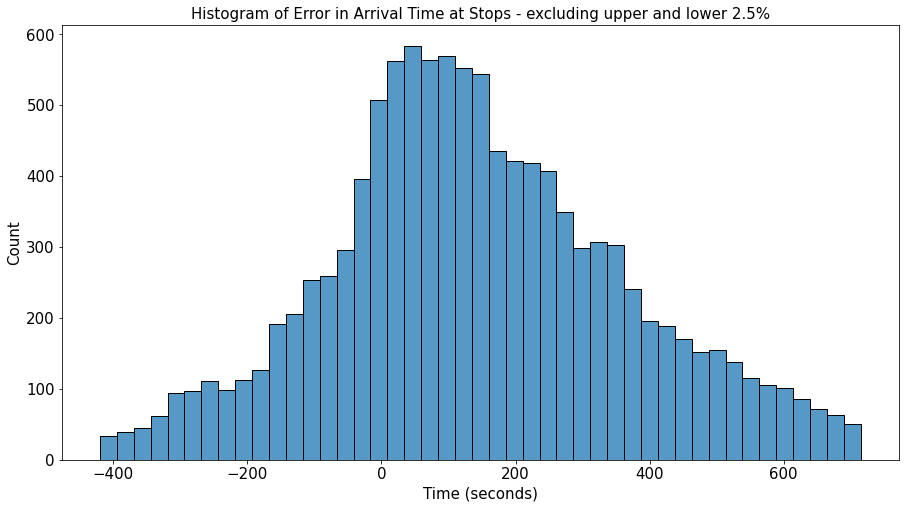

In [50]:
# calculate value 2 standard deviations above the mean
topTwoSDs = LT_46A_68_1['A_error'].mean() + (2*LT_46A_68_1['A_error'].std())
bottomTwoSDs = LT_46A_68_1['A_error'].mean() - (2*LT_46A_68_1['A_error'].std())
AE_NoOutliers = LT_46A_68_1.loc[LT_46A_68_1['A_error'] < topTwoSDs]
AE_NoOutliers = AE_NoOutliers.loc[LT_46A_68_1['A_error'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(AE_NoOutliers['A_error'],kde = False)
plt.xlabel('Time (seconds)')

plt.title('Histogram of Error in Arrival Time at Stops - excluding upper and lower 2.5%')
plt.show()

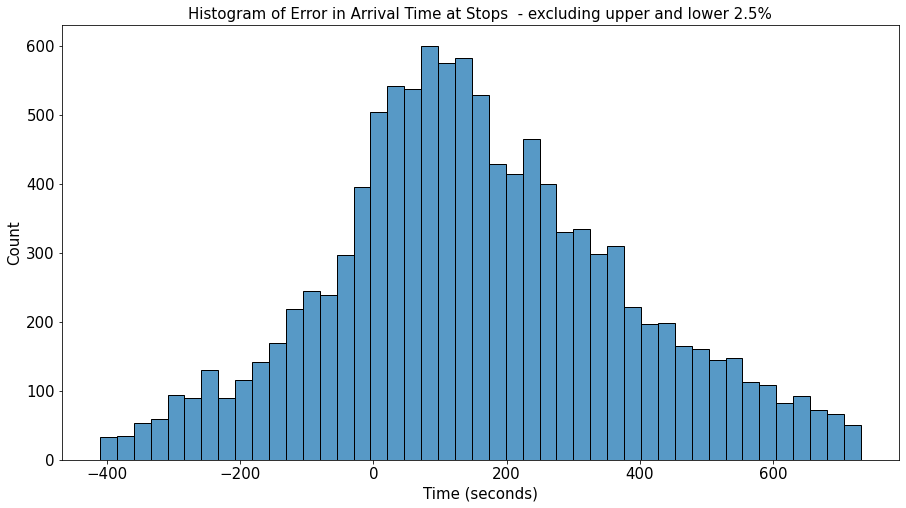

In [51]:
# calculate value 2 standard deviations above the mean
topTwoSDs = LT_46A_68_1['D_error'].mean() + (2*LT_46A_68_1['D_error'].std())
bottomTwoSDs = LT_46A_68_1['D_error'].mean() - (2*LT_46A_68_1['D_error'].std())
DE_NoOutliers = LT_46A_68_1.loc[LT_46A_68_1['D_error'] < topTwoSDs]
DE_NoOutliers = DE_NoOutliers.loc[LT_46A_68_1['D_error'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(DE_NoOutliers['D_error'],kde = False)
plt.xlabel('Time (seconds)')

plt.title('Histogram of Error in Arrival Time at Stops  - excluding upper and lower 2.5%')
plt.show()

In [52]:
std_DE_max = DE_NoOutliers['D_error'].max()
std_DE_min = DE_NoOutliers['D_error'].min()

print(std_DE_max)
print(std_DE_min)

731.0
-410.0


In [53]:
std_AE_max = AE_NoOutliers['A_error'].max()
std_AE_min = AE_NoOutliers['A_error'].min()

print(std_AE_max)
print(std_AE_min)

715.0
-420.0


In [54]:
LT_46A_68_1 = LT_46A_68_1[(LT_46A_68_1.D_error < std_DE_max) & (LT_46A_68_1.D_error > std_DE_min)]
LT_46A_68_1 = LT_46A_68_1[(LT_46A_68_1.A_error < std_AE_max) & (LT_46A_68_1.A_error > std_AE_min)]


In [55]:
print(LT_46A_68_1['A_error'].max())
print(LT_46A_68_1['A_error'].min())

print(LT_46A_68_1['D_error'].max())
print(LT_46A_68_1['D_error'].min())

714.0
-416.0
730.0
-409.0


In [56]:
# assuming that we are using the same feature selection used for trips
# the visibility column is a category because it was still like that from before kevin put it back to continuous
# so if using that it must be changed back in dask file
# 

<AxesSubplot:xlabel='PROGRNUMBER'>

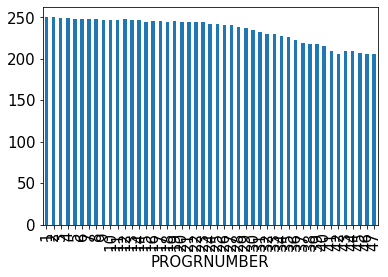

In [57]:
LT_46A_68_1.groupby(['PROGRNUMBER']).size().plot(kind = "bar")


<AxesSubplot:xlabel='PROGRNUMBER', ylabel='Average Arrival Error'>

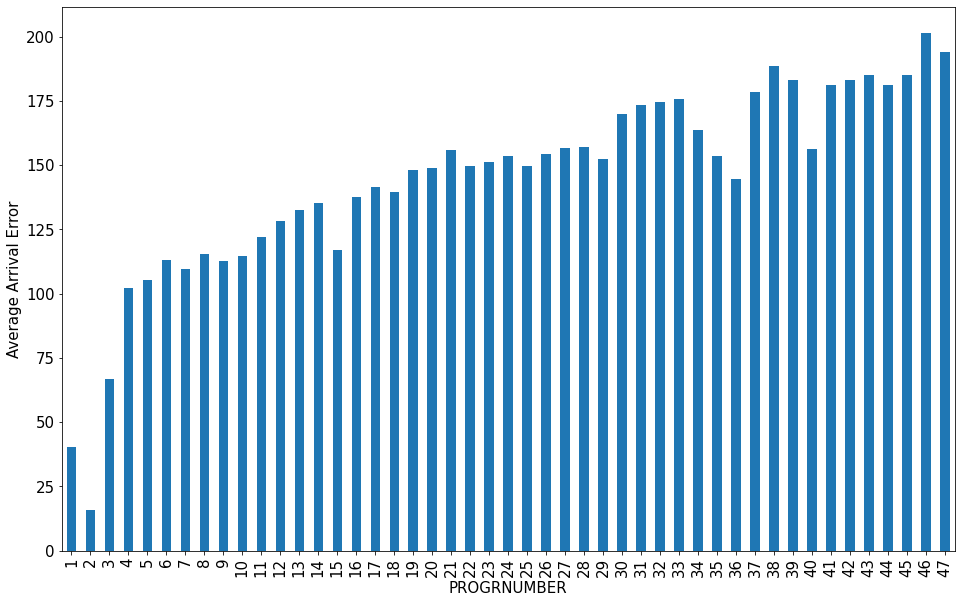

In [58]:
 LT_46A_68_1.groupby('PROGRNUMBER')['A_error'].mean().plot(kind = "bar", ylabel="Average Arrival Error", figsize=(16,10))

- As one would expect, error is greater at later stops